Coronary Heart Disease Prediction Project.

This project aims to predict the risk of coronary heart disease (CHD) using the Framingham Heart Study dataset.
It includes data preprocessing, exploratory data analysis (EDA), model training, and evaluation.

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler, FunctionTransformer
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, HistGradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import RFE
from scipy.stats.mstats import winsorize
import pickle

In [59]:
%cd '/content/drive/MyDrive/Coronary Heart Disease Prediction Project'

/content/drive/MyDrive/Coronary Heart Disease Prediction Project


In [ ]:
# Load the Dataset
df = pd.read_csv("framingham.csv")

In [ ]:
# Data Inspection
print("Dataset Information:")
df.info()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 5

In [ ]:
print("\nFirst 5 Rows of the Dataset:")
df.head()


First 5 Rows of the Dataset:


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [ ]:
print("\nMissing Values per Column:")
print(df.isnull().sum())


Missing Values per Column:
male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64


In [ ]:
print("\nUnique Values per Column:")
print(df.nunique())


Unique Values per Column:
male                  2
age                  39
education             4
currentSmoker         2
cigsPerDay           33
BPMeds                2
prevalentStroke       2
prevalentHyp          2
diabetes              2
totChol             248
sysBP               234
diaBP               146
BMI                1364
heartRate            73
glucose             143
TenYearCHD            2
dtype: int64


In [ ]:
# Define specific categorical and numerical columns for processing
cat_cols = ["male", "education", "currentSmoker", "BPMeds", "prevalentStroke", "prevalentHyp", "diabetes"]
num_cols = ["age", "cigsPerDay", "totChol", "sysBP", "diaBP", "BMI", "glucose"]

In [ ]:
# Impute Missing Values using KNN Imputer
knn_imputer = KNNImputer(n_neighbors=5)
df_imputed = pd.DataFrame(knn_imputer.fit_transform(df), columns=df.columns)
df = df_imputed

# Exploratory Data Analysis (EDA)

<ipython-input-11-019ad9d4cb51>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='TenYearCHD', data=df, palette='Set2')


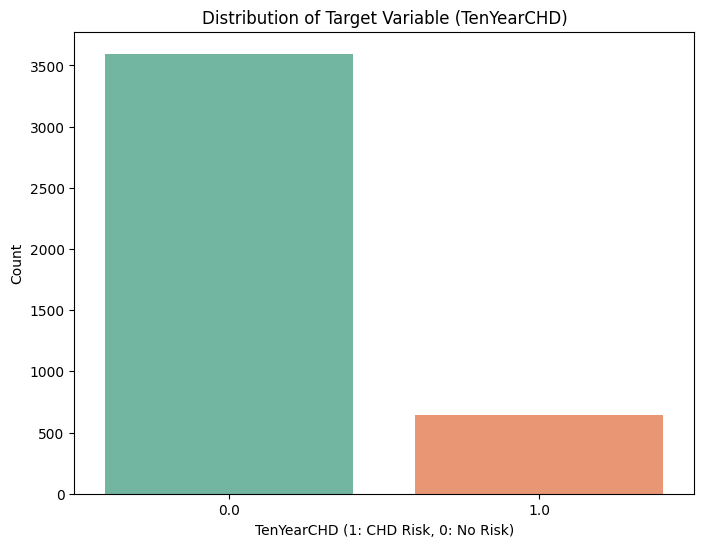

In [ ]:
# Target Variable Distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='TenYearCHD', data=df, palette='Set2')
plt.title("Distribution of Target Variable (TenYearCHD)")
plt.xlabel("TenYearCHD (1: CHD Risk, 0: No Risk)")
plt.ylabel("Count")
plt.show()

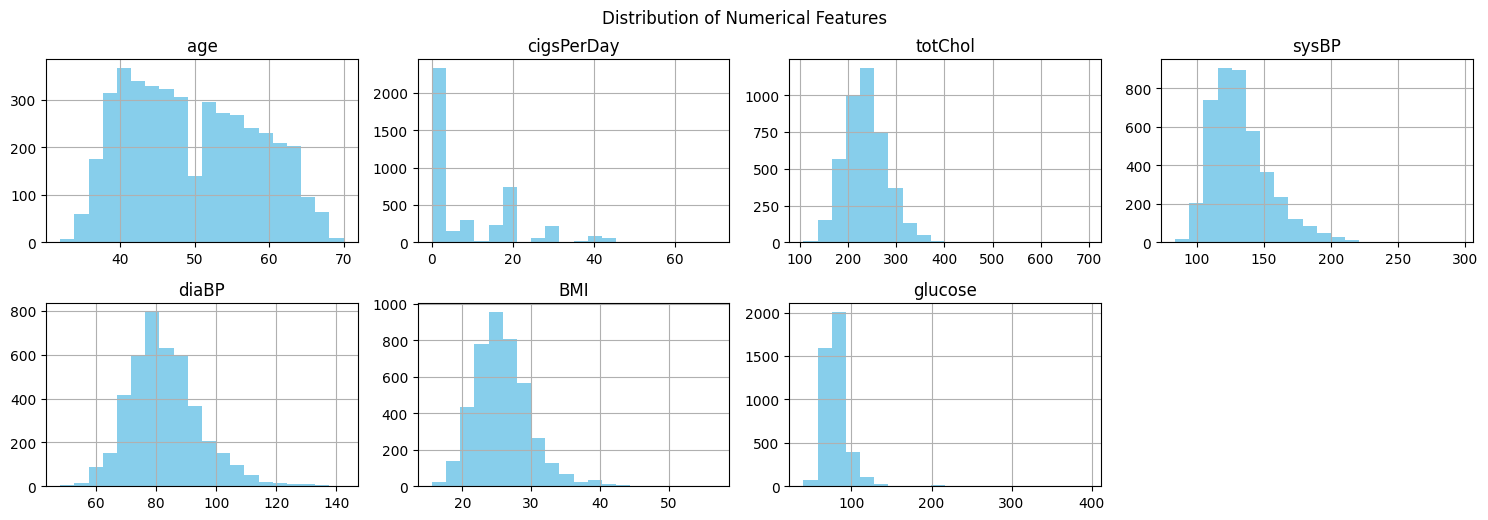

In [ ]:
# Distribution of Numerical Features
df[num_cols].hist(bins=20, figsize=(15, 10), layout=(4, 4), color='skyblue')
plt.suptitle("Distribution of Numerical Features")
plt.tight_layout()
plt.show()

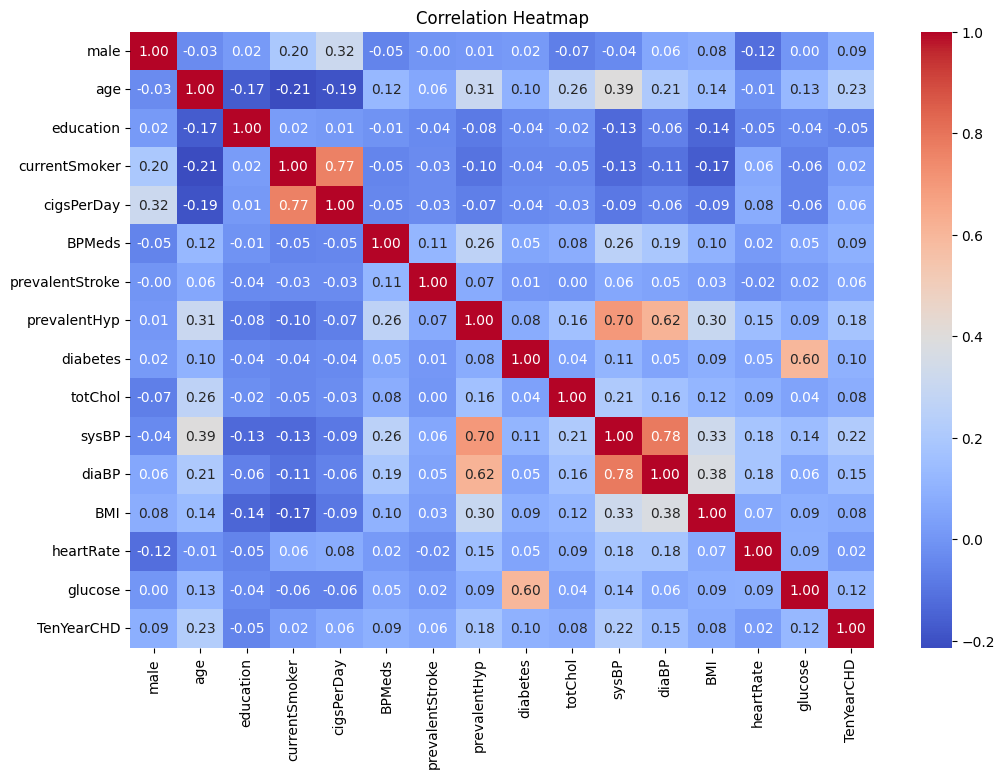

In [ ]:
# Correlation Heatmap
plt.figure(figsize=(12, 8))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


In [ ]:
# Top Correlated Features with Target
print("\nTop Correlated Features with TenYearCHD:")
print(corr['TenYearCHD'].sort_values(ascending=False))


Top Correlated Features with TenYearCHD:
TenYearCHD         1.000000
age                0.225408
sysBP              0.216374
prevalentHyp       0.177458
diaBP              0.145112
glucose            0.123270
diabetes           0.097344
BPMeds             0.089778
male               0.088374
totChol            0.082070
BMI                0.075809
prevalentStroke    0.061823
cigsPerDay         0.057766
heartRate          0.023101
currentSmoker      0.019448
education         -0.053702
Name: TenYearCHD, dtype: float64


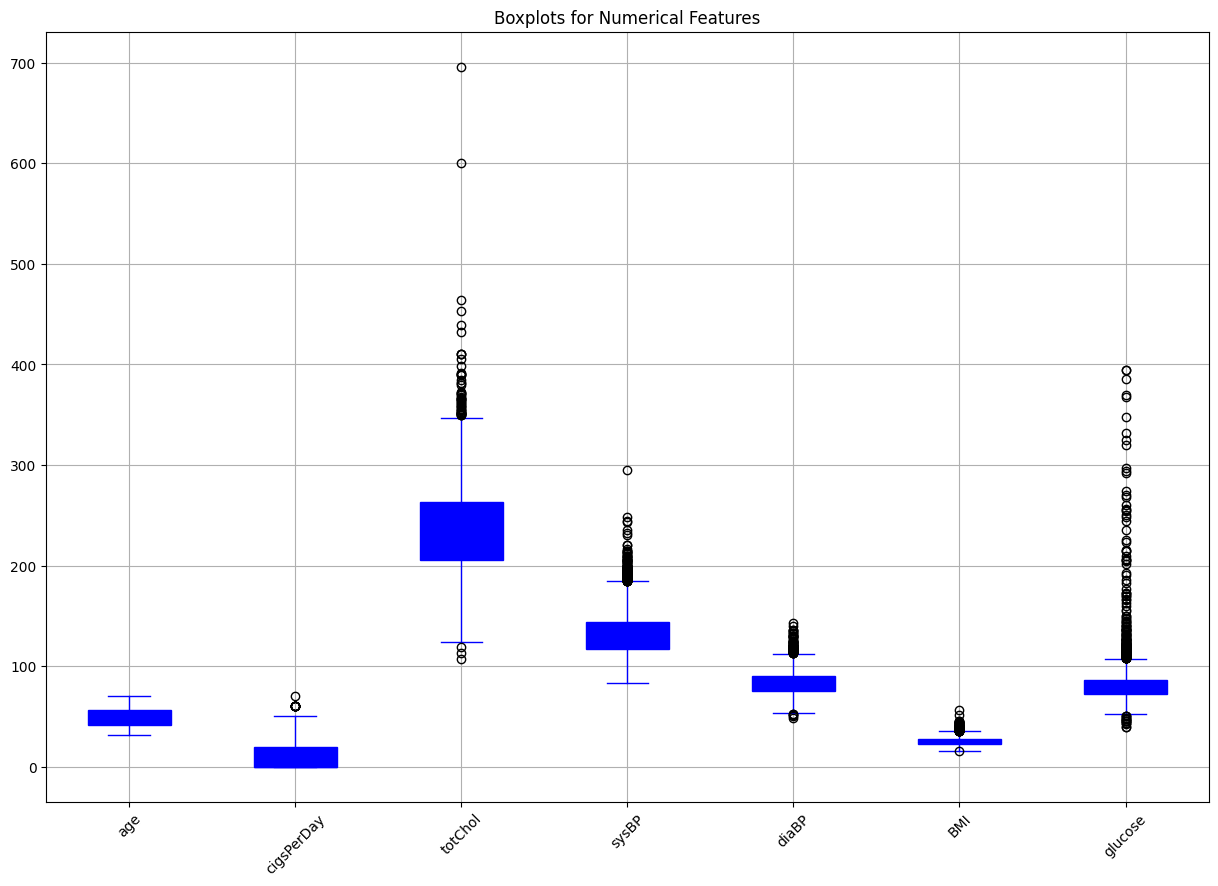

In [ ]:
# Boxplots for Numerical Features
plt.figure(figsize=(15, 10))
df[num_cols].boxplot(figsize=(15, 8), color='blue', patch_artist=True)
plt.title("Boxplots for Numerical Features")
plt.xticks(rotation=45)
plt.show()

<ipython-input-16-e42d23cdeeba>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='TenYearCHD', y=feature, data=df, palette='Set2')


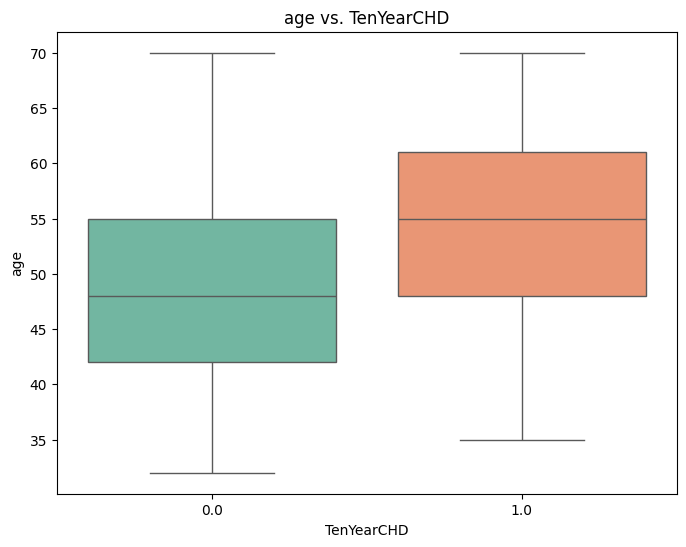

<ipython-input-16-e42d23cdeeba>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='TenYearCHD', y=feature, data=df, palette='Set2')


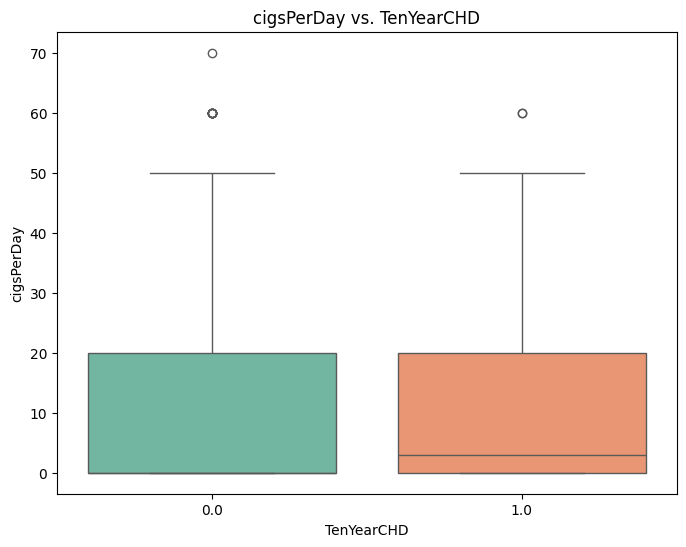

<ipython-input-16-e42d23cdeeba>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='TenYearCHD', y=feature, data=df, palette='Set2')


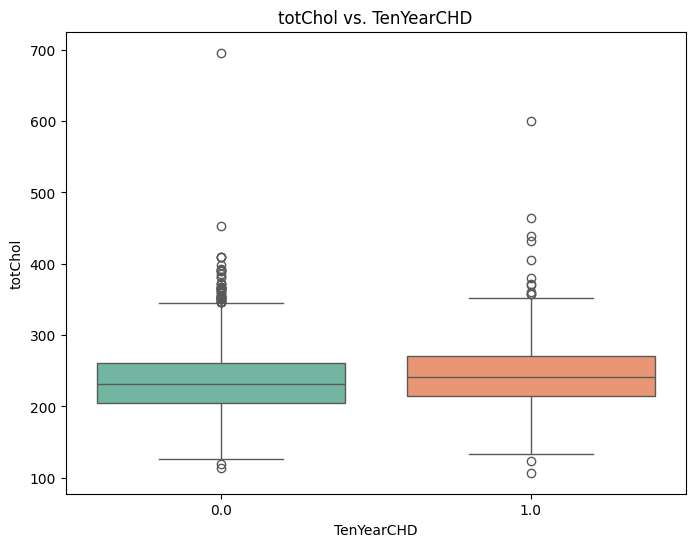

<ipython-input-16-e42d23cdeeba>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='TenYearCHD', y=feature, data=df, palette='Set2')


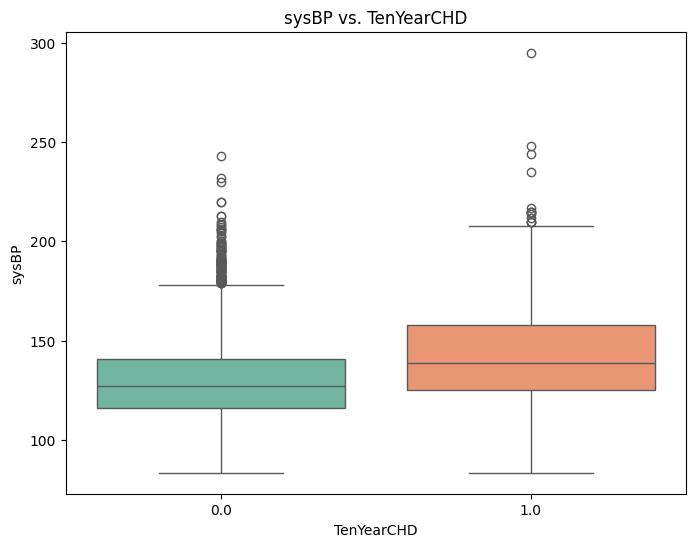

<ipython-input-16-e42d23cdeeba>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='TenYearCHD', y=feature, data=df, palette='Set2')


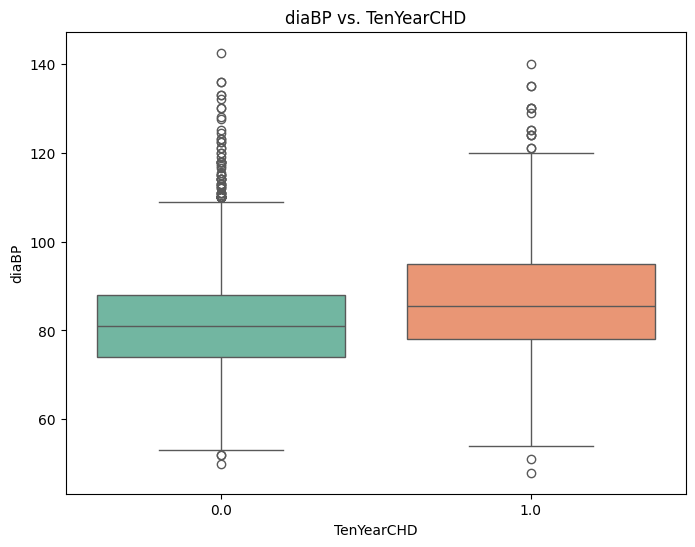

<ipython-input-16-e42d23cdeeba>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='TenYearCHD', y=feature, data=df, palette='Set2')


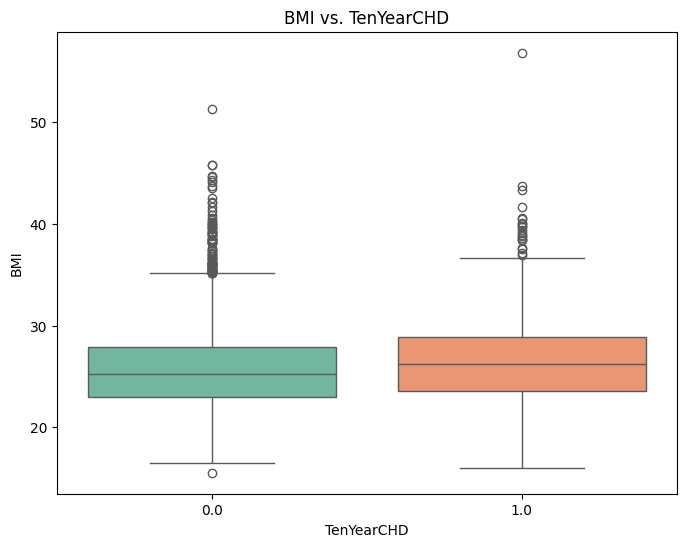

<ipython-input-16-e42d23cdeeba>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='TenYearCHD', y=feature, data=df, palette='Set2')


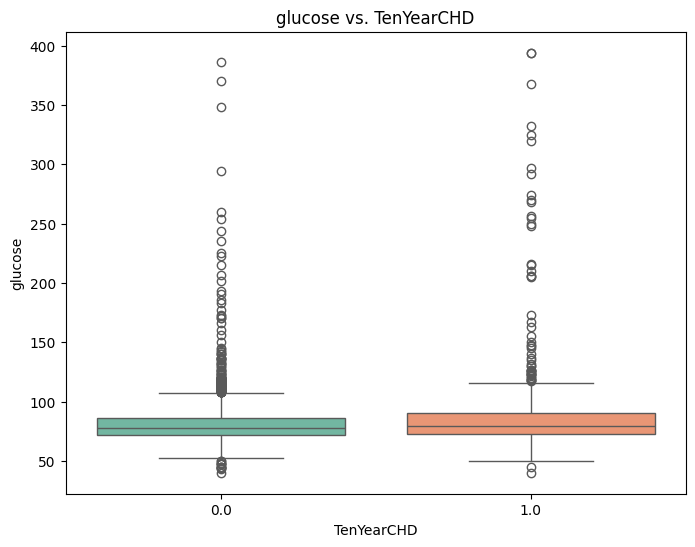

In [ ]:
# Boxplots of Numerical Features vs. Target
for feature in num_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='TenYearCHD', y=feature, data=df, palette='Set2')
    plt.title(f"{feature} vs. TenYearCHD")
    plt.show()

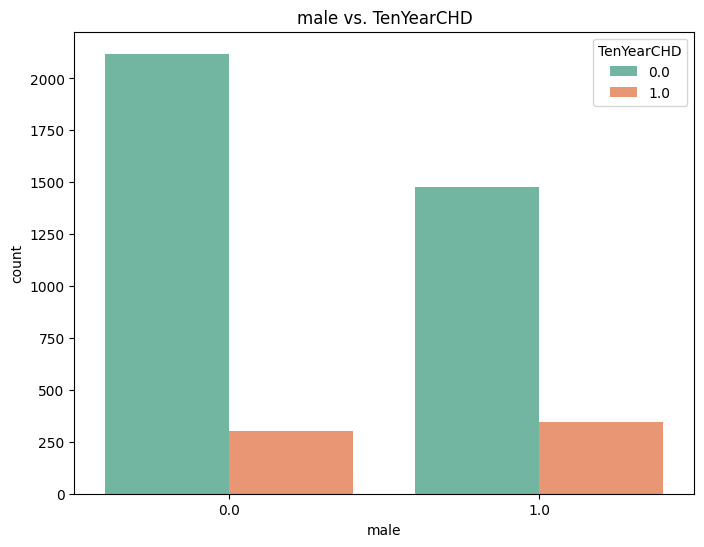

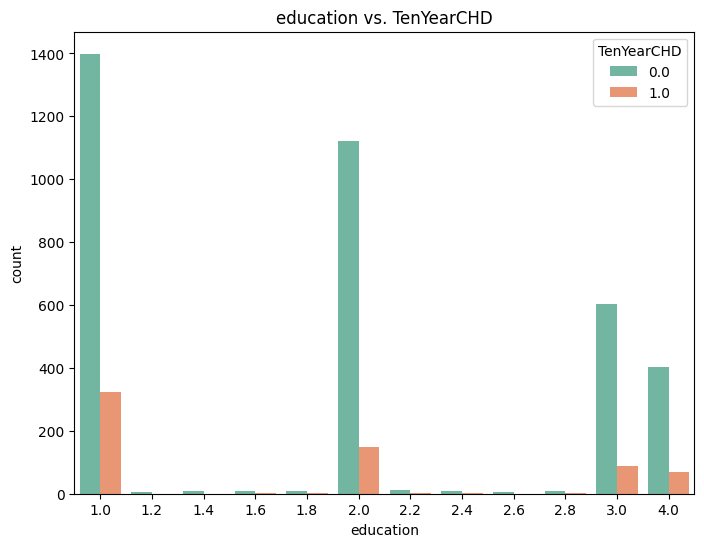

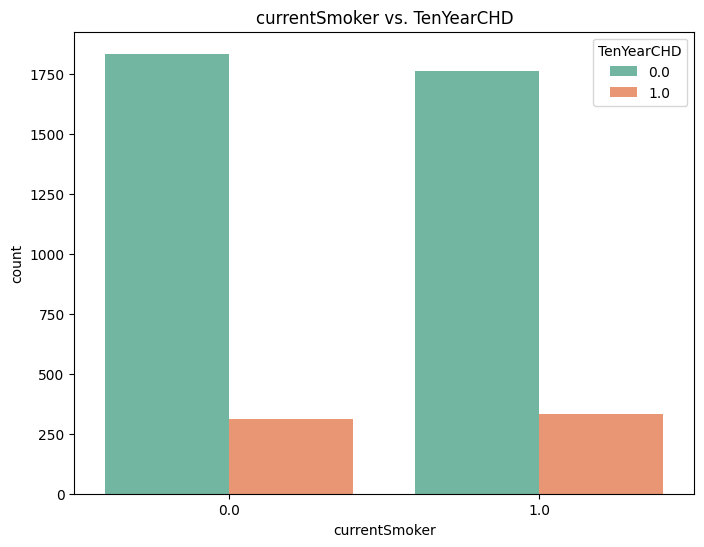

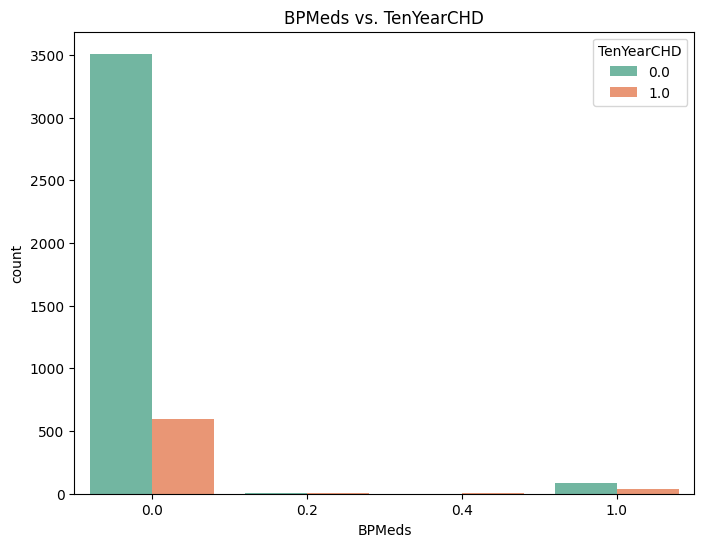

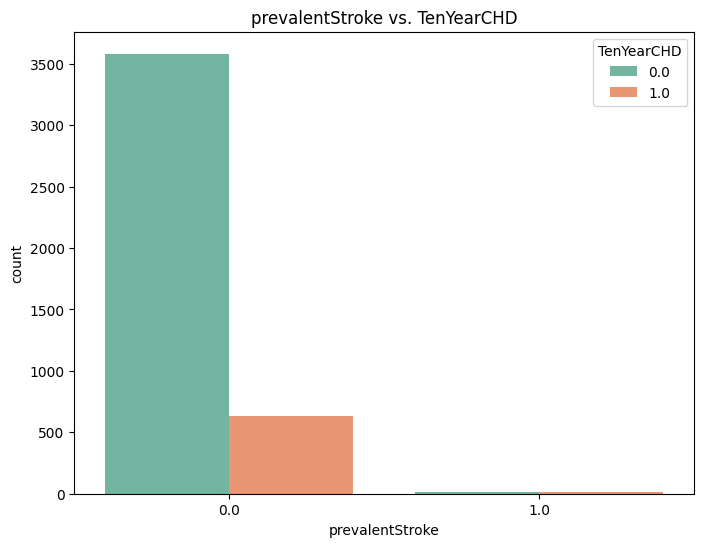

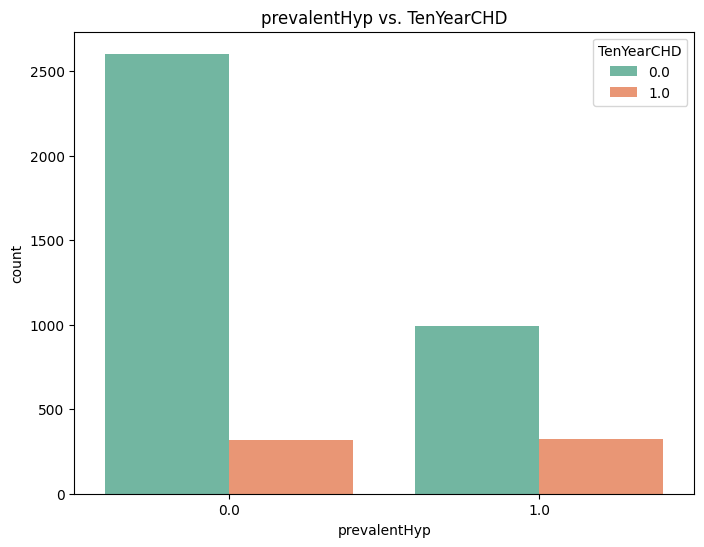

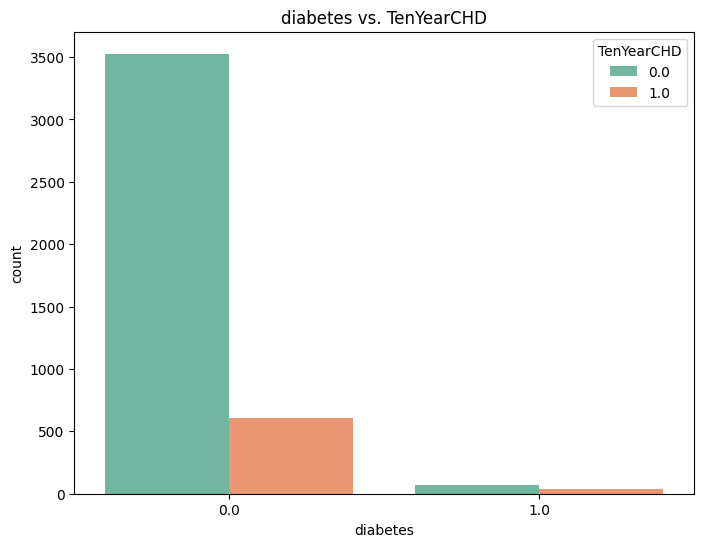

In [ ]:
# Countplots of Categorical Features vs. Target
for feature in cat_cols:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=feature, hue='TenYearCHD', data=df, palette='Set2')
    plt.title(f"{feature} vs. TenYearCHD")
    plt.show()

# Feature Engineering

In [ ]:
# Log Transformation for Skewed Numerical Features
print("\nSkewness of Numerical Features:")
print(df[num_cols].skew())



Skewness of Numerical Features:
age           0.228867
cigsPerDay    1.249256
totChol       0.873821
sysBP         1.145285
diaBP         0.713250
BMI           0.982896
glucose       6.404244
dtype: float64


In [ ]:
df[num_cols] = np.log1p(df[num_cols])

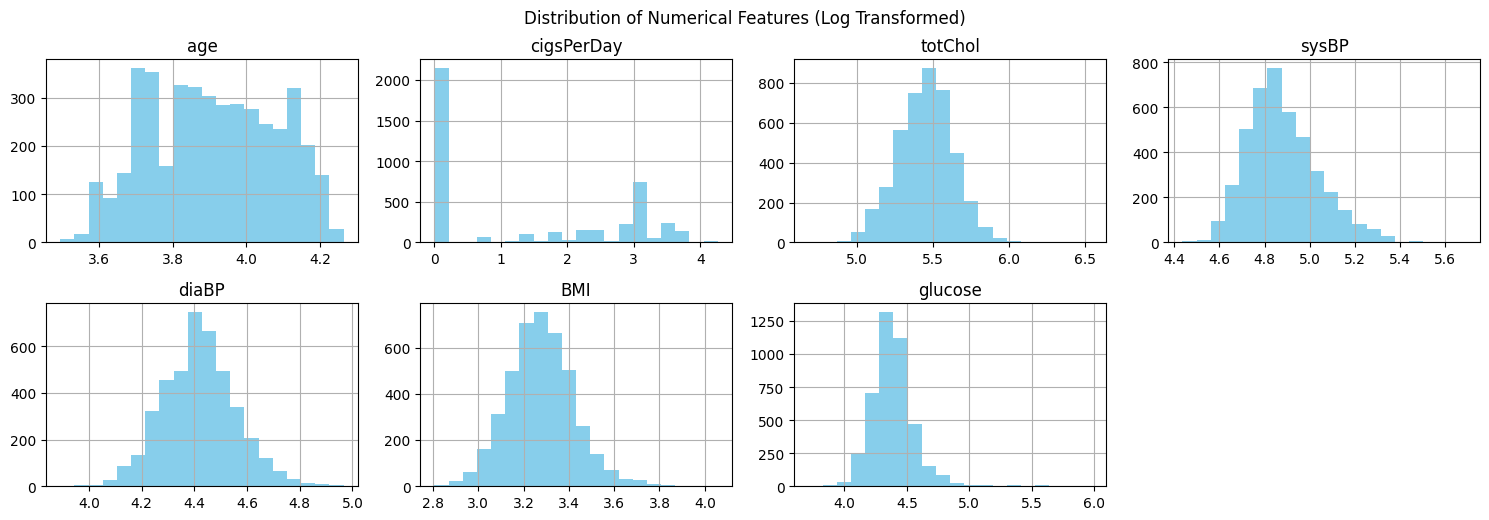

In [ ]:
# Distribution of Numerical Features after Log Transformation
df[num_cols].hist(bins=20, figsize=(15, 10), layout=(4, 4), color='skyblue')
plt.suptitle("Distribution of Numerical Features (Log Transformed)")
plt.tight_layout()
plt.show()

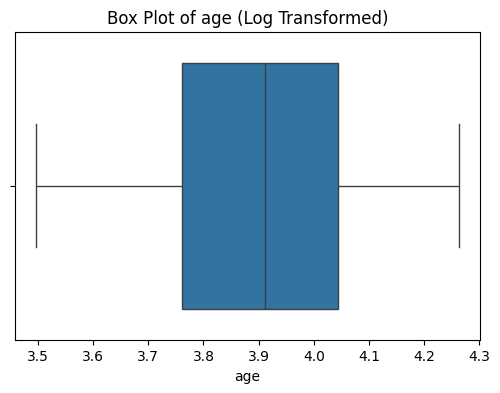

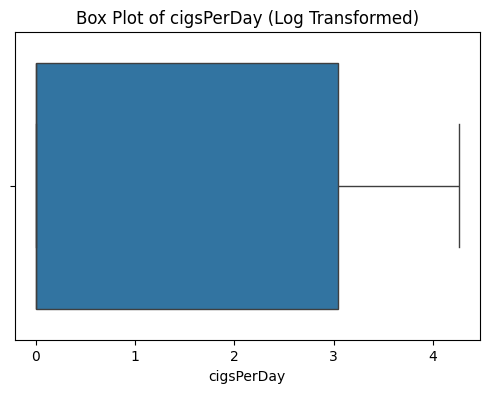

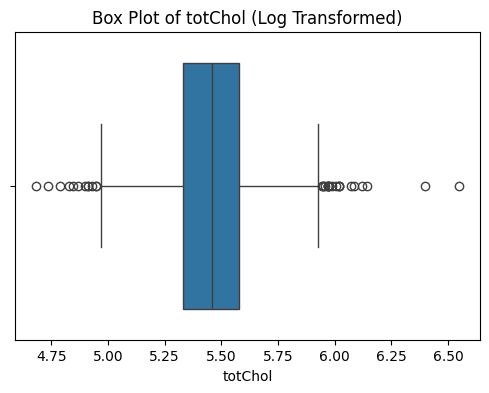

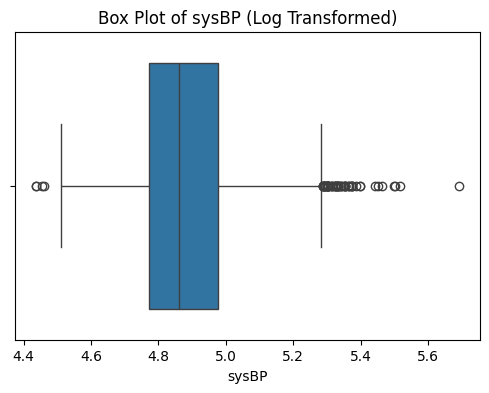

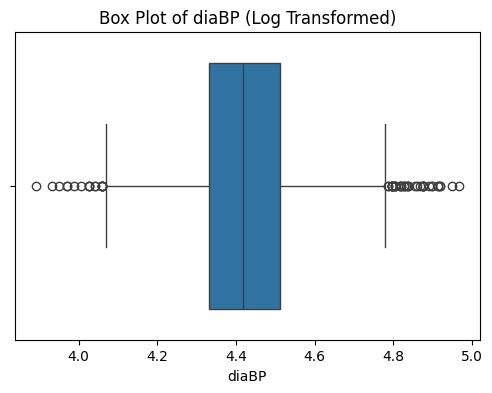

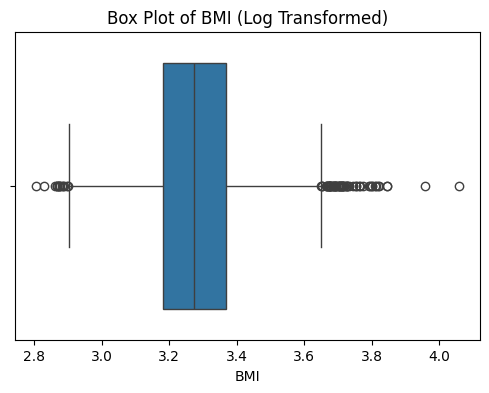

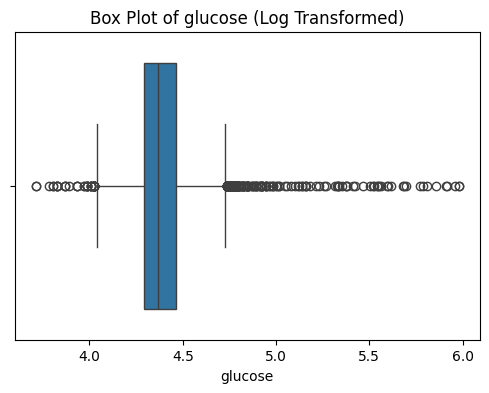

In [ ]:
# Boxplots after Log Transformation
for col in df[num_cols].columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col], orient="h")
    plt.title(f"Box Plot of {col} (Log Transformed)")
    plt.show()

In [ ]:
# Outlier Detection and Handling (Winsorization)
def detect_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return lower_bound, upper_bound


In [ ]:
print("\nOutlier Counts before Winsorization:")
for feature in num_cols:
    lower, upper = detect_outliers(df[feature])
    outliers = df[(df[feature] < lower) | (df[feature] > upper)]
    print(f"Outliers in {feature}: {len(outliers)}")


Outlier Counts before Winsorization:
Outliers in age: 0
Outliers in cigsPerDay: 0
Outliers in totChol: 32
Outliers in sysBP: 61
Outliers in diaBP: 59
Outliers in BMI: 78
Outliers in glucose: 214


In [ ]:
# Apply Winsorization
for feature in num_cols:
    df[feature] = winsorize(df[feature], limits=[0.05, 0.05])

In [ ]:
print("\nOutlier Counts after Winsorization:")
for feature in num_cols:
    lower, upper = detect_outliers(df[feature])
    outliers = df[(df[feature] < lower) | (df[feature] > upper)]
    print(f"Outliers in {feature} after Winsorization: {len(outliers)}")


Outlier Counts after Winsorization:
Outliers in age after Winsorization: 0
Outliers in cigsPerDay after Winsorization: 0
Outliers in totChol after Winsorization: 0
Outliers in sysBP after Winsorization: 0
Outliers in diaBP after Winsorization: 0
Outliers in BMI after Winsorization: 0
Outliers in glucose after Winsorization: 0


/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition

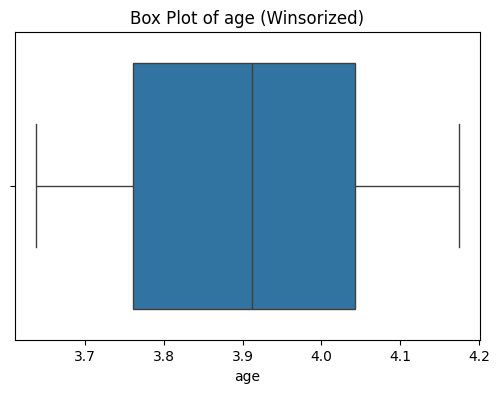

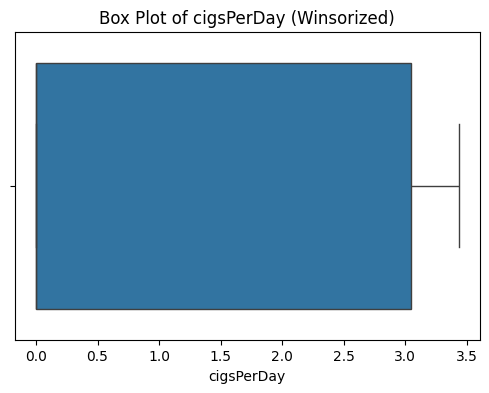

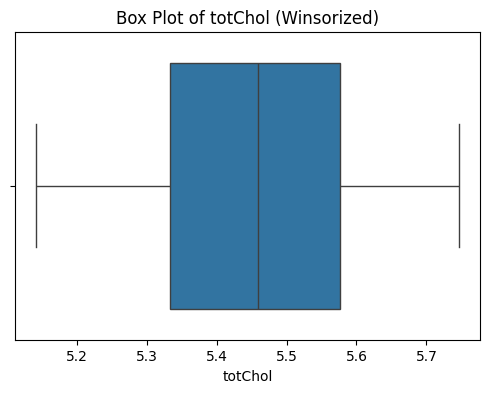

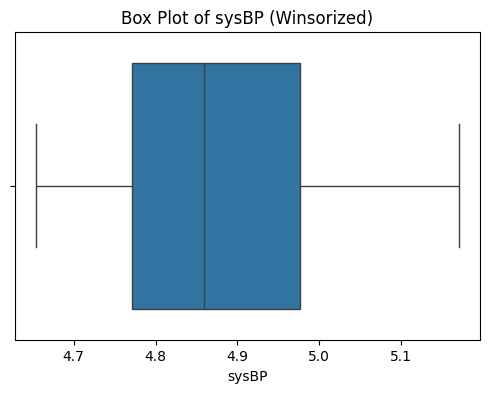

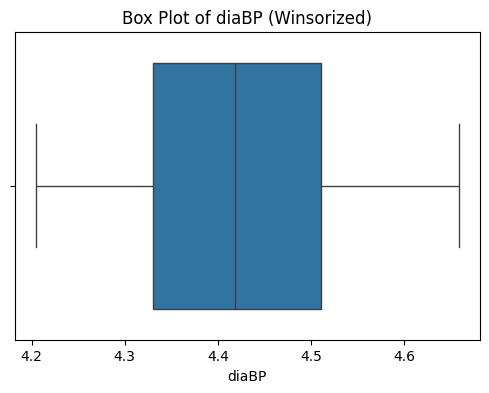

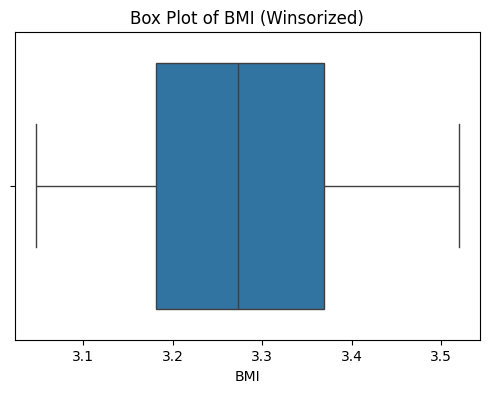

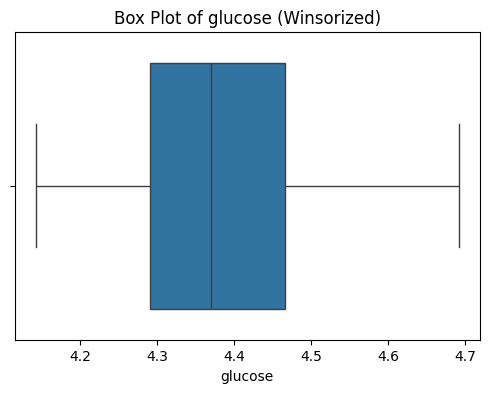

In [ ]:
# Boxplots after Winsorization
for col in df[num_cols].columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col], orient="h")
    plt.title(f"Box Plot of {col} (Winsorized)")
    plt.show()


In [ ]:
# Feature Scaling (Min-Max Scaling)
scaler = MinMaxScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

In [ ]:
# Prepare Data for Model Training
X = df.drop('TenYearCHD', axis=1)
y = df['TenYearCHD']

In [ ]:
# Handle Class Imbalance with SMOTE
smote = SMOTE(random_state=42)
X, y = smote.fit_resample(X, y)

In [ ]:
# Split Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training and Evaluation

In [ ]:
# Define Binary Classifiers
binary_classifiers = {
    "LR": LogisticRegression(random_state=42),
    "SVM": SVC(random_state=42),
    "KNN": KNeighborsClassifier(),
    "DT": DecisionTreeClassifier(random_state=42),
    "RF": RandomForestClassifier(random_state=42),
    "GB": GradientBoostingClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "XGB": XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
    "NB": GaussianNB(),
    "NN": MLPClassifier(random_state=42, max_iter=500)
}

In [ ]:
# Train and Evaluate Models
print("\nModel Training and Evaluation:")
for classifier in binary_classifiers:
    model = binary_classifiers[classifier]
    model.fit(X_train, y_train)
    print(f"\n{model}")
    print(f"Training Accuracy: {model.score(X,y):.4f}")
    print(f"Test Accuracy: {model.score(X_test, y_test):.4f}")
    print(classification_report(y_test, model.predict(X_test)))
    print("-" * 100)


Model Training and Evaluation:


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



LogisticRegression(random_state=42)
Training Accuracy: 0.6808
Test Accuracy: 0.6671
              precision    recall  f1-score   support

         0.0       0.69      0.64      0.66       745
         1.0       0.64      0.70      0.67       694

    accuracy                           0.67      1439
   macro avg       0.67      0.67      0.67      1439
weighted avg       0.67      0.67      0.67      1439

----------------------------------------------------------------------------------------------------

SVC(random_state=42)
Training Accuracy: 0.5736
Test Accuracy: 0.5768
              precision    recall  f1-score   support

         0.0       0.61      0.50      0.55       745
         1.0       0.55      0.66      0.60       694

    accuracy                           0.58      1439
   macro avg       0.58      0.58      0.58      1439
weighted avg       0.58      0.58      0.57      1439

------------------------------------------------------------------------------------------

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [19:51:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)
Training Accuracy: 0.9732
Test Accuracy: 0.8867
              precision    recall  f1-score   support

         0.0       0.88      0.91      0.89       745
         1.0       0.90      0.86      0.88       694

    accuracy              

# Random Forest Model Simplification and Training

In [ ]:
rf = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
)

In [ ]:
rf.fit(X_train, y_train)

print("\nRandom Forest Metrics After Simplifying:")
print(f"Training Accuracy: {rf.score(X, y):.4f}")
print(f"Test Accuracy: {rf.score(X_test, y_test):.4f}")


Random Forest Metrics After Simplifying:
Training Accuracy: 0.9775
Test Accuracy: 0.8874


In [ ]:
# Data Preprocessing Pipeline
def log1p_transform(X):
    return np.log1p(X)

log1p_transformer = FunctionTransformer(log1p_transform)

In [ ]:
def winsorize_transform(X):
    return np.array([winsorize(col, limits=[0.05, 0.05]) for col in X.T]).T

winsorize_transformer = FunctionTransformer(winsorize_transform)


In [ ]:
num_pipeline = Pipeline([
    ('imputer', KNNImputer(n_neighbors=5)),
    ('log1p', log1p_transformer),
    ('winsorize', winsorize_transformer),
    ('scaler', MinMaxScaler())
])

In [ ]:
cat_pipeline = Pipeline([
    ('imputer', KNNImputer(n_neighbors=5))
])

In [ ]:
preprocessor = ColumnTransformer([
    ('num', num_pipeline, num_cols),
    ('cat', cat_pipeline, cat_cols)
])

In [ ]:
# Full Pipeline with Random Forest Classifier
full_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])


In [ ]:
full_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   KNNImputer()),
                                                                  ('log1p',
                                                                   FunctionTransformer(func=<function log1p_transform at 0x7c779052c220>)),
                                                                  ('winsorize',
                                                                   FunctionTransformer(func=<function winsorize_transform at 0x7c779052c2c0>)),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['age', 'cigsPerDay',
                                                   'totChol', 'sysBP', 'diaBP',
                                                   'BMI', 'glucose']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   KNNImputer())]),
                                                  ['male', 'education',
                                                   'currentSmoker', 'BPMeds',
                                                   'prevalentStroke',
                                                   'prevalentHyp',
                                                   'diabetes'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [ ]:
print("\nFull Pipeline with SMOTE and Random Forest:")
print(f"Training Accuracy: {full_pipeline.score(X, y):.4f}")
print(f"Test Accuracy: {full_pipeline.score(X_test, y_test):.4f}")


Full Pipeline with SMOTE and Random Forest:
Training Accuracy: 0.9748
Test Accuracy: 0.8749


In [63]:
# Model Persistence (Saving the Model)
filename = 'chd.pkl'
with open(filename, 'wb') as file:
    pickle.dump(full_pipeline, file)

# Run streamlit on colab

In [69]:
!pip install -r "requirements.txt"

In [74]:
print("Tunnel Password:")
!wget -q -O - ipv4.icanhazip.com

Tunnel Password:
35.231.159.149


In [71]:
!npm install localtunnel

⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋
up to date, audited 23 packages in 2s
⠋
⠋3 packages are looking for funding
⠋  run `npm fund` for details
⠋
2 moderate severity vulnerabilities

To address all issues (including breaking changes), run:
  npm audit fix --force

Run `npm audit` for details.
⠋

In [72]:
! streamlit run app.py & npx localtunnel --port 8501



⠙⠹⠸⠼
  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://35.231.159.149:8501

your url is: https://sixty-hats-bake.loca.lt
  Stopping...
^C
